<a href="https://colab.research.google.com/github/eduzegarra/grade_01/blob/main/proyecto_papa_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly_express
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
          

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import os
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
import sys
import torch
import torch.nn as nn

In [ ]:
data = pd.read_excel('data_clean.xls')

In [ ]:
data.describe()

,Unnamed: 0,year,nmes,volumen,precio,month,ubigeo,spi,import,ln_price,ln_vol
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2777.000000,1725.000000,2911.000000,2911.000000
mean,3799.908966,2008.178976,6.252147,1598.596688,0.714864,6.252147,10.184473,0.286799,30134.535652,-0.402056,5.466768
std,2120.860185,6.431659,3.360419,2666.261579,0.281379,3.360419,2.638594,0.808362,13378.520204,0.356919,2.298408
min,1.000000,1997.000000,1.000000,0.600000,0.300000,1.000000,5.000000,-1.670000,13578.000000,-1.203973,-0.510826
25%,2007.500000,2003.000000,3.000000,31.095000,0.550000,3.000000,10.000000,-0.260000,19536.000000,-0.597837,3.437045
50%,3827.000000,2008.000000,6.000000,197.000000,0.640000,6.000000,12.000000,0.310000,23019.000000,-0.446287,5.283204
75%,5604.500000,2014.000000,9.000000,2042.000000,0.790000,9.000000,12.000000,0.960000,40793.000000,-0.235722,7.621681
max,7459.000000,2019.000000,12.000000,16033.000000,2.090000,12.000000,12.000000,2.190000,52938.000000,0.737164,9.682404


In [ ]:
data.columns

Index(['Unnamed: 0', 'mm', 'year', 'nmes', 'variedad', 'provincia', 'volumen',
       'precio', 'month', 'ubigeo', 'dep', 'spi', 'import', 'ln_price',
       'ln_vol'],
      dtype='object')

In [ ]:
data['variedad'].unique()

array(['Papa Blanca'], dtype=object)

In [ ]:
data['dep'].unique()

array(['Huánuco', 'Junín', 'Ayacucho', nan], dtype=object)

In [ ]:
data.info

<bound method DataFrame.info of       Unnamed: 0         mm  year  nmes     variedad   provincia  volumen  \
0              1 1997-01-01  1997     1  Papa Blanca     Huanuco  2979.13   
1              5 1997-01-01  1997     1  Papa Blanca  Concepcion    79.44   
2              6 1997-01-01  1997     1  Papa Blanca    Pachitea   978.36   
3              7 1997-01-01  1997     1  Papa Blanca    Huancayo  1170.75   
4              8 1997-01-01  1997     1  Papa Blanca    Oxapampa    10.20   
...          ...        ...   ...   ...          ...         ...      ...   
2906        7449 2019-12-01  2019    12  Papa Blanca     Huanuco  9557.00   
2907        7450 2019-12-01  2019    12  Papa Blanca       Tarma  2867.00   
2908        7451 2019-12-01  2019    12  Papa Blanca    Huancayo  4446.00   
2909        7453 2019-12-01  2019    12  Papa Blanca    Huamanga   324.00   
2910        7459 2019-12-01  2019    12  Papa Blanca      Huanta    88.00   

      precio  month  ubigeo      dep   spi 

Generamos dummies para el modelo de redes neuronales

In [ ]:
data_dum = pd.get_dummies(data.drop('Unnamed: 0', axis=1), columns=['nmes', 'provincia'])

In [ ]:
data_dum.describe()

,year,volumen,precio,month,ubigeo,spi,import,ln_price,ln_vol,nmes_1,...,provincia_Pachitea,provincia_Parinacochas,provincia_Paucar Del Sar Sara,provincia_Satipo,provincia_Sucre,provincia_Tarma,provincia_Tayacaja,provincia_Victor Fajardo,provincia_Vilcas Huaman,provincia_Yauli
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2777.000000,1725.000000,2911.000000,2911.000000,2911.000000,...,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000
mean,2008.178976,1598.596688,0.714864,6.252147,10.184473,0.286799,30134.535652,-0.402056,5.466768,0.080728,...,0.053933,0.001374,0.001374,0.002405,0.001374,0.093439,0.092752,0.000344,0.005496,0.004122
std,6.431659,2666.261579,0.281379,3.360419,2.638594,0.808362,13378.520204,0.356919,2.298408,0.272464,...,0.225925,0.037050,0.037050,0.048987,0.037050,0.291096,0.290134,0.018534,0.073946,0.064084
min,1997.000000,0.600000,0.300000,1.000000,5.000000,-1.670000,13578.000000,-1.203973,-0.510826,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,31.095000,0.550000,3.000000,10.000000,-0.260000,19536.000000,-0.597837,3.437045,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,197.000000,0.640000,6.000000,12.000000,0.310000,23019.000000,-0.446287,5.283204,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,2042.000000,0.790000,9.000000,12.000000,0.960000,40793.000000,-0.235722,7.621681,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,16033.000000,2.090000,12.000000,12.000000,2.190000,52938.000000,0.737164,9.682404,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_dum.columns

Index(['mm', 'year', 'variedad', 'volumen', 'precio', 'month', 'ubigeo', 'dep',
       'spi', 'import', 'ln_price', 'ln_vol', 'nmes_1', 'nmes_2', 'nmes_3',
       'nmes_4', 'nmes_5', 'nmes_6', 'nmes_7', 'nmes_8', 'nmes_9', 'nmes_10',
       'nmes_11', 'nmes_12', 'provincia_Cangallo', 'provincia_Chanchamayo',
       'provincia_Chupaca', 'provincia_Concepcion',
       'provincia_Daniel Alcides Carrion', 'provincia_Dos De Mayo',
       'provincia_Huamalies', 'provincia_Huamanga', 'provincia_Huanca Sancos',
       'provincia_Huancayo', 'provincia_Huanta', 'provincia_Huanuco',
       'provincia_Jauja', 'provincia_Julcan', 'provincia_Junin',
       'provincia_La Mar', 'provincia_Leoncio Prado', 'provincia_Lucanas',
       'provincia_Maranon', 'provincia_Oxapampa', 'provincia_Pachitea',
       'provincia_Parinacochas', 'provincia_Paucar Del Sar Sara',
       'provincia_Satipo', 'provincia_Sucre', 'provincia_Tarma',
       'provincia_Tayacaja', 'provincia_Victor Fajardo',
       'provincia_Vil

In [ ]:
data_dum.drop(['mm', 'variedad', 'month'], axis=1, inplace=True)

Definición de dataset de modelamiento

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data_X = data_dum.drop(['precio', 'ubigeo', 'spi', 'import', 'ln_price', 'ln_vol', 'ubigeo', 'dep'], axis = 1)
X = np.array(data_X)
scaler.fit(X)
X = scaler.transform(X)
X.shape

(2911, 44)

In [ ]:
y = np.array(data_dum.precio).reshape(-1,1)
scaler.fit(y)
y = scaler.transform(y)
y.shape

(2911, 1)

Generamos el modelo

In [ ]:
X_np = X.astype(np.float64)
y_np = y.astype(np.float32)
X_tn= torch.from_numpy(X_np)
y_tn = torch.from_numpy(y_np.reshape(-1, 1))
X_tn.shape, y_tn.shape

(torch.Size([2911, 44]), torch.Size([2911, 1]))

In [ ]:
np.save('X_np.np', X_np)
np.save('y_np.np', y_np)

In [ ]:
model = nn.Sequential(
  nn.Linear(44, 512),
  nn.ReLU(),
  nn.Linear(512, 128),
  nn.ReLU(),
  nn.Linear(128, 32),
  nn.ReLU(),
  nn.Linear(32, 4),
  nn.ReLU(),
  nn.Linear(4, 1),
)

In [ ]:
optimizador = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)
criterio = torch.nn.MSELoss()

In [ ]:
torch.cuda.device_count(), torch.cuda.get_device_name(0)

(1, 'Tesla T4')

In [ ]:
model.cuda()
X_g = X_tn.float().cuda()
y_g = y_tn.cuda()

In [ ]:
X_g.shape, y_g.shape

(torch.Size([2911, 44]), torch.Size([2911, 1]))

In [ ]:
errores = []
preds = []
nit = -1
EPOCS = 1000000

In [ ]:
nit += 1
for epo in range(EPOCS):
  optimizador.zero_grad()
  y_pred = model(X_g)
  loss = criterio(y_pred, y_g)
  loss.backward()
  optimizador.step()
  if epo % int(EPOCS/10) == 0:
    print(epo, loss.item())
    errores.append([epo+nit*EPOCS, loss.item()])
    pred = y_pred.cpu().detach().numpy()
    preds.append(pred)

0 0.08717550337314606
100000 0.017281610518693924
200000 0.016407325863838196
300000 0.016305817291140556
400000 0.01622692495584488
500000 0.016154758632183075
600000 0.01608673483133316
700000 0.01601998880505562
800000 0.015951041132211685
900000 0.015881331637501717


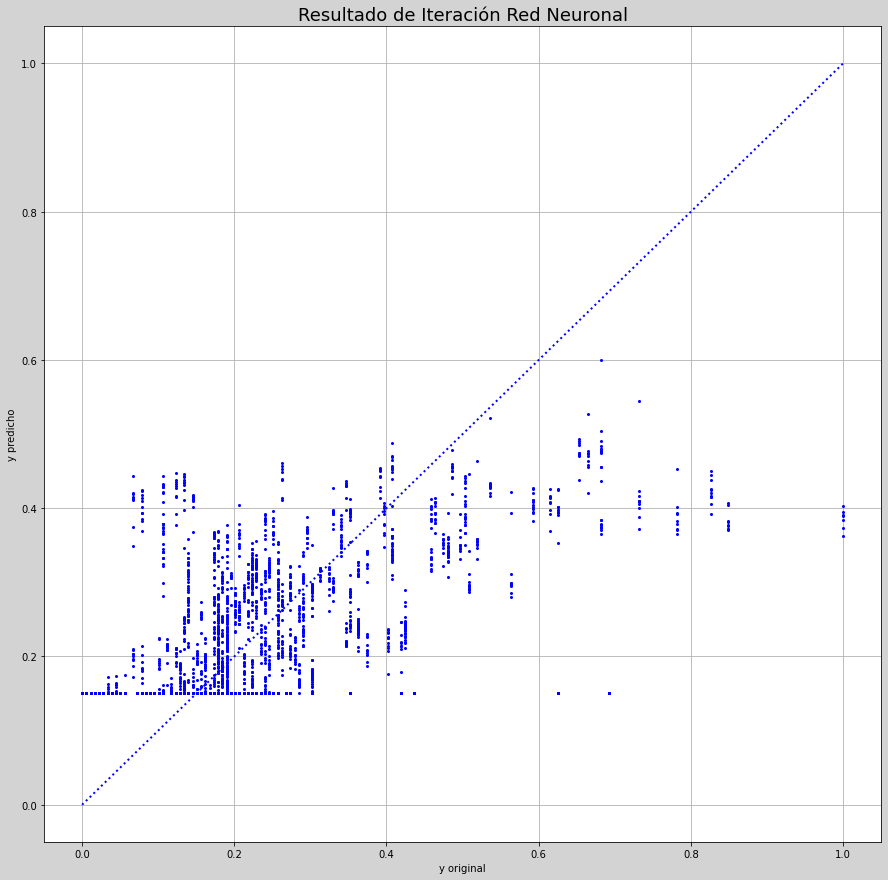

In [ ]:
#@title Gráfica
f = plt.figure(figsize=(15,15), facecolor='lightgray')

ax1 = f.add_subplot(111)
ax1.plot(y_np, pred, 'bo', ms=2, label='Red Neuronal')
ax1.plot([0,1], [0, 1], 'b:', lw=2)
ax1.set_title('Resultado de Iteración Red Neuronal', fontsize=18)
plt.xlabel('y original')
plt.ylabel('y predicho')
plt.grid(True)
plt.savefig('alineamiento2.jpg')
plt.show()

In [ ]:
plt.savefig('plot.png', format='png')

<Figure size 432x288 with 0 Axes>